In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import regex as re
import gensim
from gensim.models import Word2Vec
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
DATASET_ENCODING = "ISO-8859-1"
df=pd.read_csv('IMDB-movie-reviews.csv',delimiter=';',encoding=DATASET_ENCODING)

# Data exploration

In [64]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [65]:
pd.reset_option('display.max_colwidth')

In [66]:
df[df['sentiment']=='negative']['review']

3     Basically there's a family where a little boy ...
7     This show was an amazing, fresh & innovative i...
8     Encouraged by the positive comments about this...
10    Phil the Alien is one of those quirky films wh...
11    I saw this movie when I was about 12 when it c...
12    So im not a big fan of Boll's work but then ag...
13    The cast played Shakespeare.<br /><br />Shakes...
15    Kind of drawn in by the erotic scenes, only to...
17    This movie made it into one of my top 10 most ...
19    An awful film! It must have been up against so...
21    I had the terrible misfortune of having to vie...
23    First of all, let's get a few things straight ...
24    This was the worst movie I saw at WorldFest an...
27    This film tried to be too many things all at o...
28    This movie was so frustrating. Everything seem...
32    My first exposure to the Templarios & not a go...
34    I watched this film not really expecting much,...
35    I bought this film at Blockbuster for $3.0

In [67]:
df[df['sentiment']=='positive']['review']

0     One of the other reviewers has mentioned that ...
1     A wonderful little production. <br /><br />The...
2     I thought this was a wonderful way to spend ti...
4     Petter Mattei's "Love in the Time of Money" is...
5     Probably my all-time favorite movie, a story o...
6     I sure would like to see a resurrection of a u...
9     If you like original gut wrenching laughter yo...
14    This a fantastic movie of three prisoners who ...
16    Some films just simply should not be remade. T...
18    I remember this film,it was the first film i h...
20    After the success of Die Hard and it's sequels...
22    What an absolutely stunning movie, if you have...
25    The Karen Carpenter Story shows a little more ...
26    "The Cell" is an exotic masterpiece, a dizzyin...
29    'War movie' is a Hollywood genre that has been...
30    Taut and organically gripping, Edward Dmytryk'...
31    "Ardh Satya" is one of the finest film ever ma...
33    One of the most significant quotes from th

In [68]:
from wordcloud import WordCloud

def get_wordcloud(data):
  # Get the positive and negative reviews
  positive_reviews = data[data['sentiment'] == 'positive']['review']
  negative_reviews = data[data['sentiment'] == 'negative']['review']

  # Create a wordcloud for positive reviews
  positive_wordcloud = WordCloud(width=1600, height=1200, background_color='white').generate(' '.join(positive_reviews))

  # Create a wordcloud for negative reviews
  negative_wordcloud = WordCloud(width=1600, height=1200, background_color='white').generate(' '.join(negative_reviews))

  # Plot the wordclouds
  plt.figure(figsize=(20, 20))
  plt.subplot(1, 2, 1)
  plt.imshow(positive_wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title('Positive Reviews Wordcloud')

  plt.subplot(1, 2, 2)
  plt.imshow(negative_wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title('Negative Reviews Wordcloud')

  plt.show()

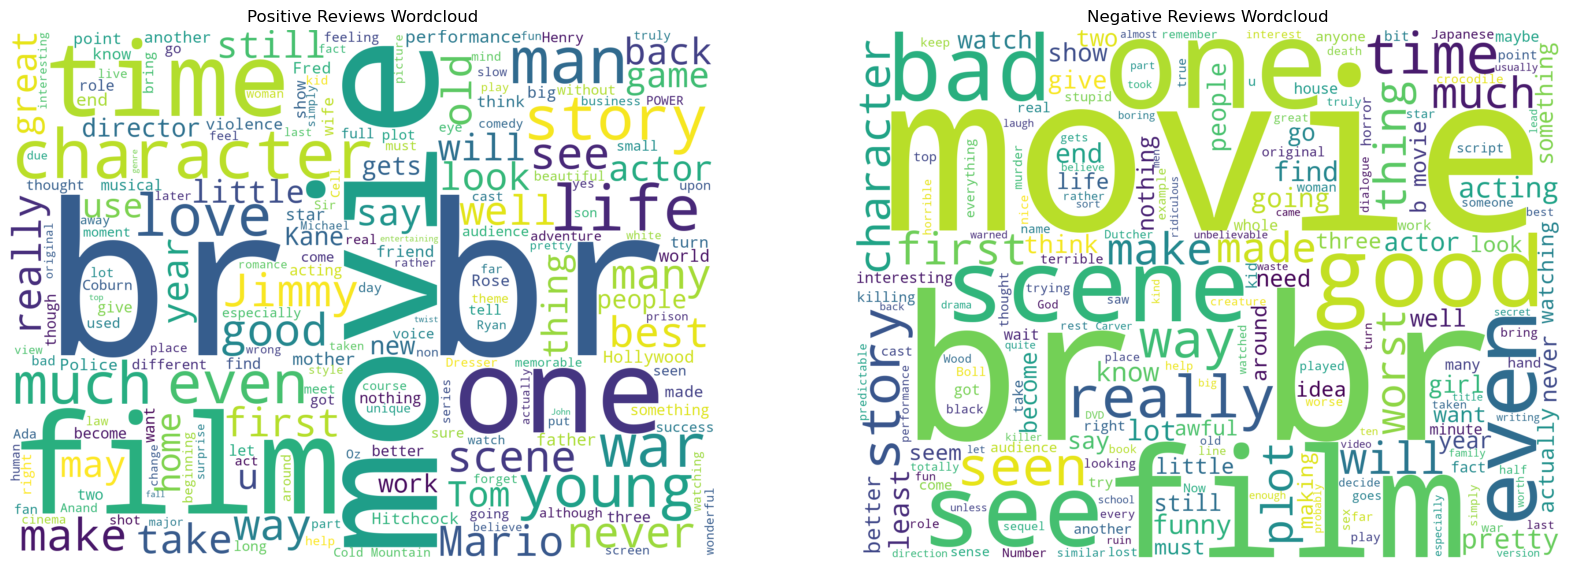

In [69]:
get_wordcloud(df)

In [70]:
df.duplicated().sum()

0

In [71]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

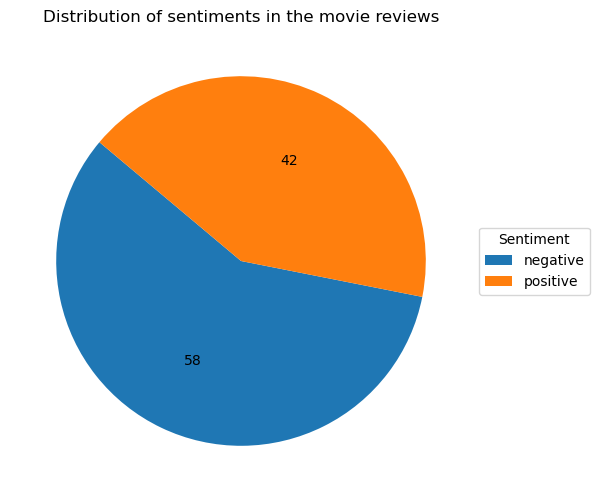

In [72]:
# Calculate the count of each class
sentiment_count = df['sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
pie_wedges = plt.pie(sentiment_count, startangle=140, autopct=lambda p: '{:.0f}'.format(p * sentiment_count.sum() / 100))

# Adding a legend
plt.legend(pie_wedges[0], ['negative', 'positive'], title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution of sentiments in the movie reviews')
plt.show()


In [73]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [74]:
def preprocess_text(text):
    text = text.str.replace(r'<.*?>', '', regex=True) # Removing everything that is between <>
    #text = text.str.replace(f"[{string.punctuation}]", "", regex=True)
    text = text.str.lower()
    text = text.str.split()
    #text = text.apply(lambda x: [word for word in x if word not in stop_words])
    #text = text.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    return text.str.join(" ")

In [75]:
%%time
df['review']=preprocess_text(df['review'])

CPU times: total: 0 ns
Wall time: 4.18 ms


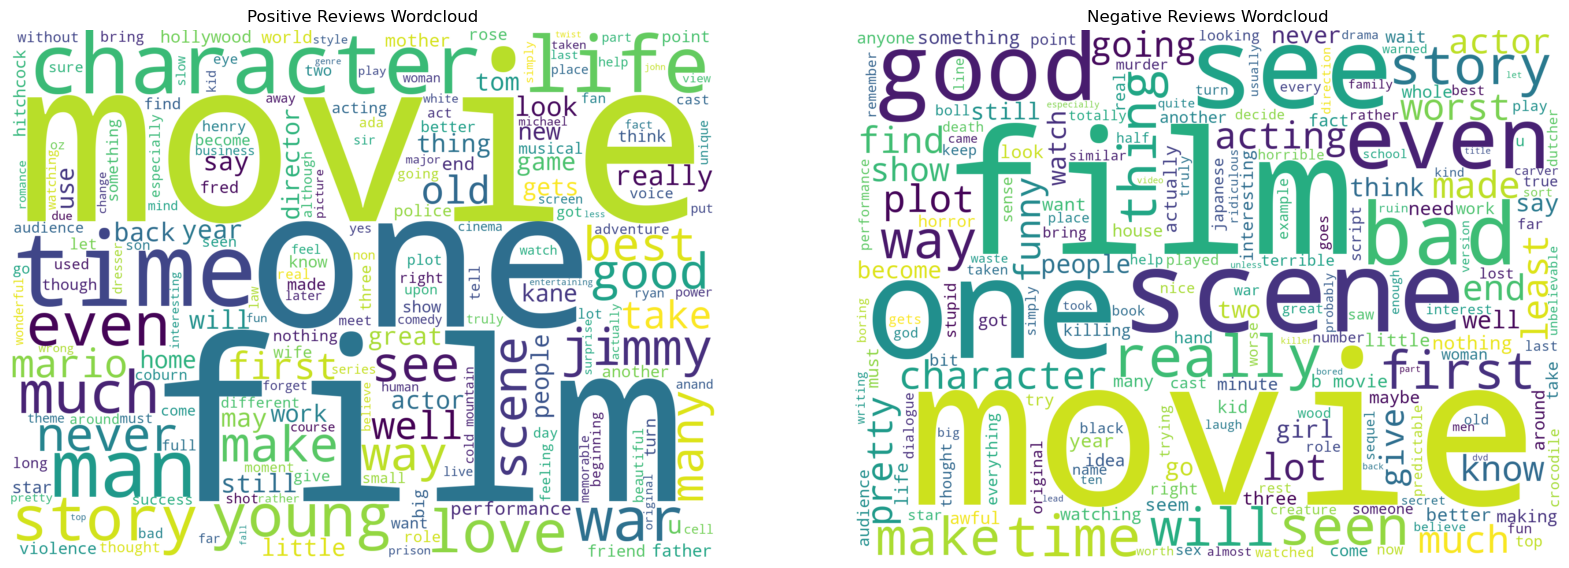

In [76]:
get_wordcloud(df)

# Word2vec

## Text embedding

In [77]:
def simple_tokenizer(text):
    tokens = re.split(r'\s+', text)
    return tokens

In [78]:
def handle_negations(tokens):
    negations = {"not", "no", "never", "n't"}
    new_tokens = []
    negation_mode = False
    for token in tokens:
        if token in negations:
            negation_mode = True
            new_tokens.append(token)
        elif negation_mode:
            new_tokens.append(f"not_{token}")
            negation_mode = False
        else:
            new_tokens.append(token)
    return new_tokens

def advanced_tokenizer(text):
    tokens = re.split(r'\s+', text)
    tokens = handle_negations(tokens)
    return tokens

In [79]:
df['tokens']=df['review'].apply(advanced_tokenizer)

In [80]:
tokenized_text=df['tokens'].tolist()

In [81]:
# Train a Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

In [82]:
def document_vector(tokens):
    # Filter tokens that are present in the Word2Vec model's vocabulary
    valid_tokens = [token for token in tokens if token in word2vec_model.wv]
    # Compute the mean of the vectors for the valid tokens
    if valid_tokens:
        return np.mean(word2vec_model.wv[valid_tokens], axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

In [83]:
# Apply the document vector function to each document
df['vector'] = df['tokens'].apply(document_vector)

# Convert list of vectors to a numpy array
X = np.array(df['vector'].tolist())

In [84]:
X

array([[-0.05802558,  0.10434653,  0.05836018, ..., -0.14450702,
         0.03048781,  0.01870959],
       [-0.06712436,  0.11999645,  0.06738491, ..., -0.16714483,
         0.03512343,  0.02347843],
       [-0.0654892 ,  0.11826424,  0.06652121, ..., -0.16438606,
         0.03402996,  0.02180009],
       ...,
       [-0.05551813,  0.10010638,  0.05591214, ..., -0.13896088,
         0.03039778,  0.01822983],
       [-0.06463195,  0.11795909,  0.06598382, ..., -0.1623493 ,
         0.03487251,  0.02169684],
       [-0.06499366,  0.11527953,  0.06547076, ..., -0.162008  ,
         0.03395906,  0.02135378]], dtype=float32)

## Model training

In [85]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
#from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve, roc_auc_score

In [86]:
# Assuming X and y are already defined
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
   # "SVM": SVC(probability=True),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=False),
   # "LightGBM": LGBMClassifier()
}

    

In [88]:
# Perform cross-validation and store results
def perform_cross_validation(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv)
    return np.mean(scores)



def evaluate_models_cv(models,X,y):
  scoresCV_list=[]s
  for model_name, model in models.items():
    score=perform_cross_validation(model, X, y)
    scoresCV_list.append(score)
  # Plotting the cross-validation results
  plt.figure(figsize=(10, 6))
  bars = plt.bar(models.keys(), scoresCV_list, color='skyblue')
  plt.xlabel('Models')
  plt.ylabel('Cross-Validation Accuracy')
  plt.title('Cross-Validation Accuracy of Different Models')
  plt.ylim([min(scoresCV_list) - 0.05, max(scoresCV_list) + 0.05])  # Set y-axis limits to give some space
  # Add text on top of the bars
  for bar in bars:
      yval = bar.get_height()
      plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')
  plt.show()



def train_and_evaluate_models(models, X_train, y_train, X_test, y_test):
  results = {}
  for model_name, model in models.items():
      # Perform 5-fold cross-validation
      cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
      # Train the model on the full training data and evaluate on the test set
      model.fit(X_train, y_train)
      predictions = model.predict(X_test)
      pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

      accuracy = accuracy_score(y_test, predictions)
      report = classification_report(y_test, predictions, output_dict=True)
      conf_matrix = confusion_matrix(y_test, predictions)

      results[model_name] = {
          "model": model,
          "cross_val_accuracy": np.mean(cv_scores),
          "accuracy": accuracy,
          "report": report,
          "conf_matrix": conf_matrix,
          "pred_prob": pred_prob
      }

      print(f"{model_name} Results:")
      print(f"Cross-Validation Accuracy: {np.mean(cv_scores)}")
      print(f"Test Accuracy: {accuracy}")
      print("Classification Report:")
      print(classification_report(y_test, predictions))
      print("Confusion Matrix:")
      print(confusion_matrix(y_test, predictions))
      print("\n")




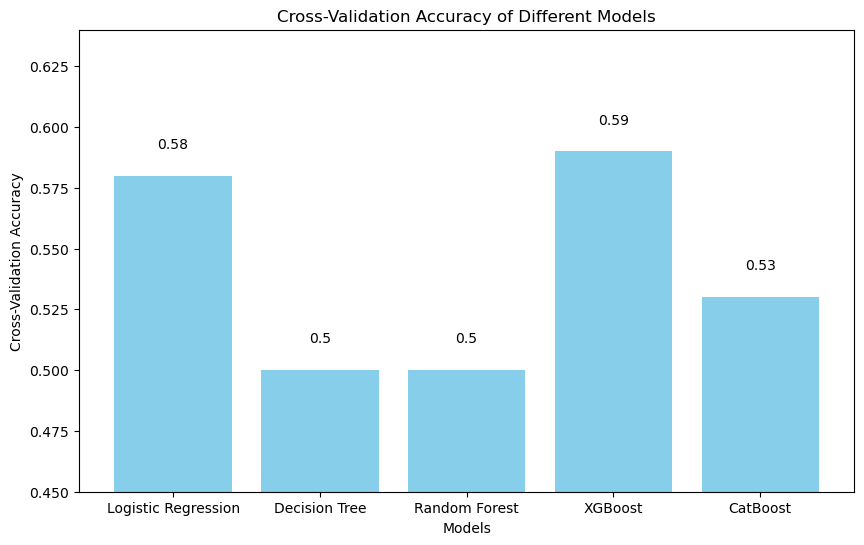

In [58]:
evaluate_models_cv(models,X,y)

## FastText

In [59]:
from gensim.models import FastText

In [60]:
fasttext_model=FastText(sentences=tokenized_text,vector_size=100,window=5,min_count=1,workers=4)

In [61]:
def document_vector(tokens):
    # Filter tokens that are present in the FastText model's vocabulary
    valid_tokens = [token for token in tokens if token in fasttext_model.wv]
    # Compute the mean of the vectors for the valid tokens
    if valid_tokens:
        return np.mean(fasttext_model.wv[valid_tokens], axis=0)
    else:
        return np.zeros(fasttext_model.vector_size)

In [62]:
# Apply the document vector function to each document
df['vector'] = df['tokens'].apply(document_vector)

# Convert list of vectors to a numpy array
X_ft = np.array(df['vector'].tolist())

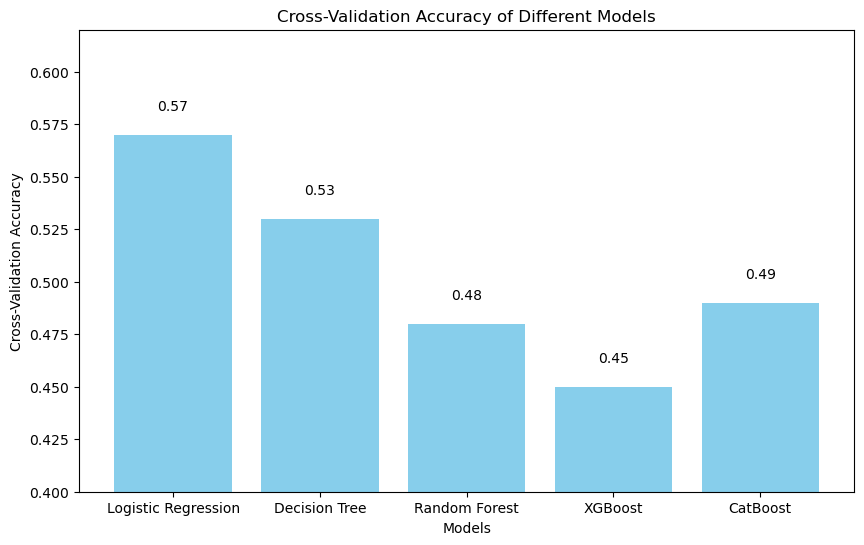

In [63]:
evaluate_models_cv(models,X_ft,y)

# Glove

In [37]:
import numpy as np

In [38]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


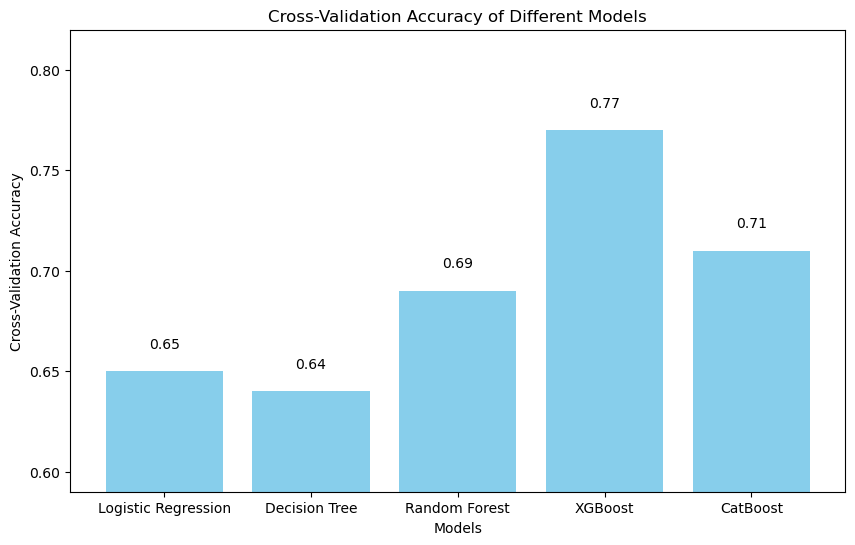

In [85]:
embeddings_index = {}

with open('glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        word, vec = line.split(' ', 1)
        vec = np.fromstring(vec, sep=' ', dtype=np.float32)
        embeddings_index[word] = vec

def document_vector(tokens):
    # Filter tokens that are present in the GloVe model's vocabulary
    valid_tokens = [token for token in tokens if token in embeddings_index]
    # Compute the mean of the vectors for the valid tokens
    if valid_tokens:
        return np.mean([embeddings_index[token] for token in valid_tokens], axis=0)
    else:
        return np.zeros(len(embeddings_index['the']))
# Apply the document vector function to each document
df['vector'] = df['tokens'].apply(document_vector)

# Convert list of vectors to a numpy array
X_glove = np.array(df['vector'].tolist())


# Evaluate models on Glove Embeddings
evaluate_models_cv(models, X_glove, y)


# Vectorizers

## Tf-IDf

In [64]:
#TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

In [65]:
X_tfidf = tfidf_vectorizer.fit_transform(df['review'])

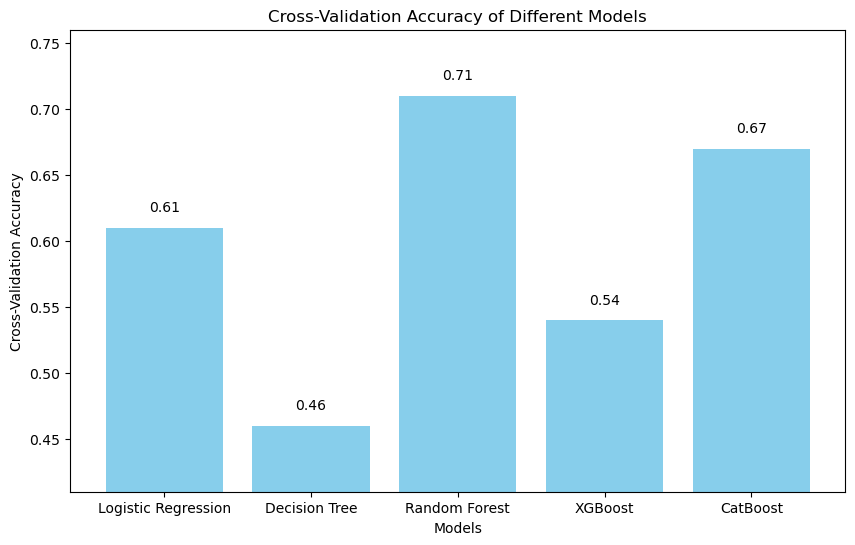

In [66]:
evaluate_models_cv(models, X_tfidf, y)

## hashing vectorizers

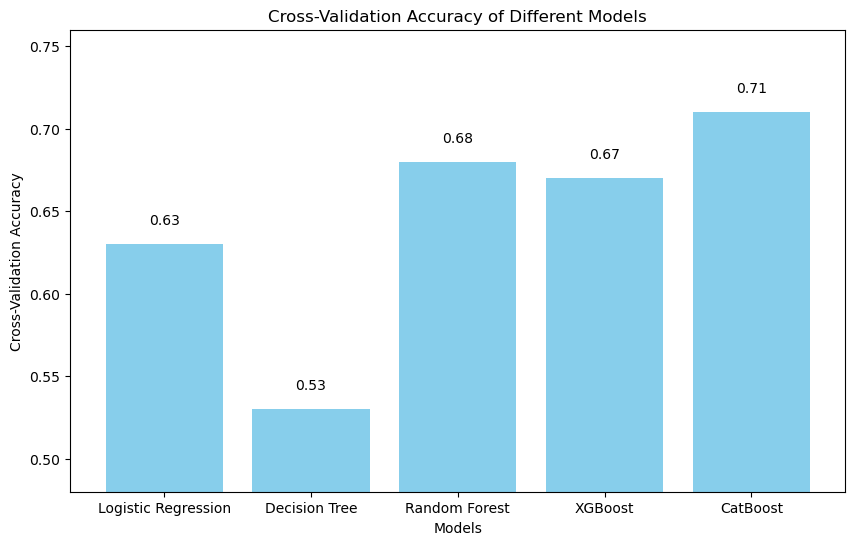

In [67]:
hash_vectorizer=HashingVectorizer(n_features=1000)
X_hash = hash_vectorizer.fit_transform(df['review'])
evaluate_models_cv(models, X_hash, y)

# BERT

In [89]:
import transformers
from transformers import BertTokenizer, BertModel
import torch

# Load the pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Move the model to the GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [69]:
def bert_tokenizer(text):
    # Encode the text using the BERT tokenizer
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding='max_length')
    return inputs

def get_bert_embeddings(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding='max_length')
    inputs = {k: v.to(device) for k, v in inputs.items()}  # Move inputs to the GPU
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()  # Move outputs to the CPU before converting to numpy

In [70]:
# Create BERT embeddings for each text
df['vector_bert'] = df['review'].apply(lambda text: get_bert_embeddings(text, model, tokenizer))
# Convert list of vectors to a numpy array
X_Bert = np.array(df['vector_bert'].tolist())

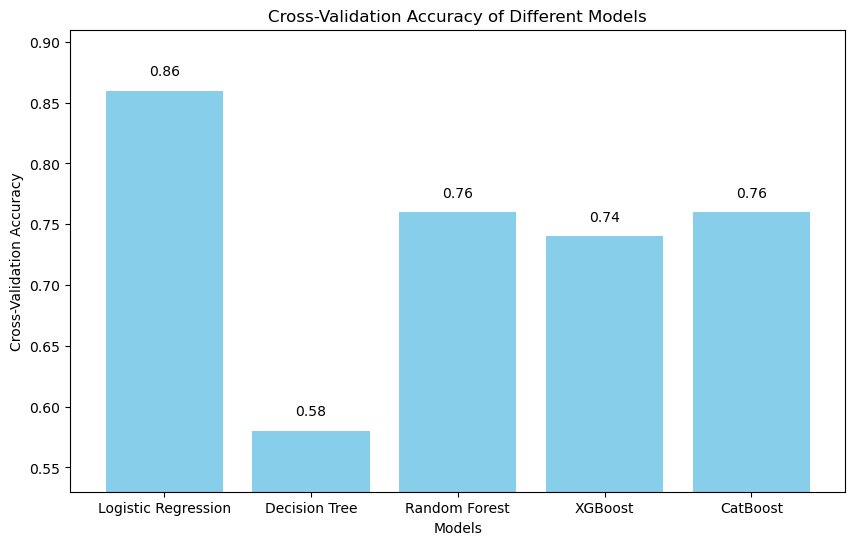

In [72]:
evaluate_models_cv(models, X_Bert, y)

# RoBERTa

In [71]:
from transformers import RobertaConfig, RobertaModel
from transformers import RobertaTokenizer

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


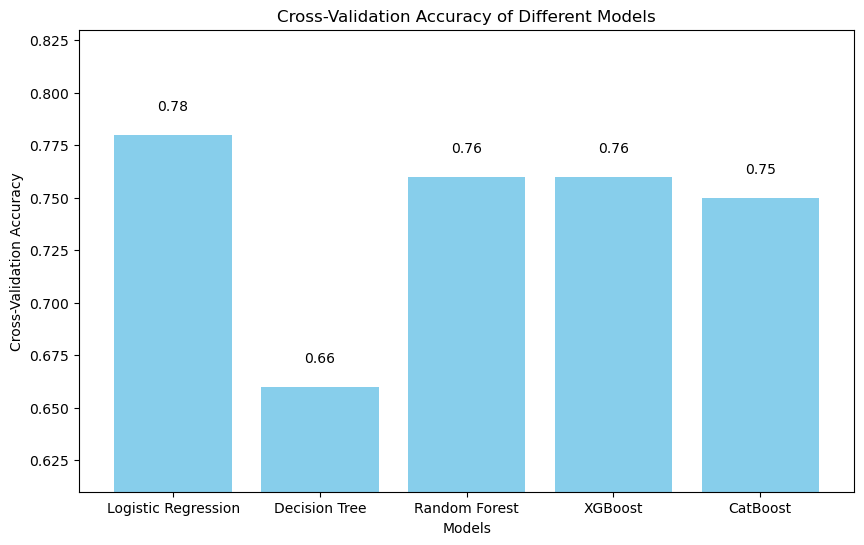

In [73]:
import numpy as np
# Load the pre-trained RoBERTa model and tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')

# Move the model to the GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

def roberta_tokenizer(text):
    # Encode the text using the RoBERTa tokenizer
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding='max_length')
    return inputs

def get_roberta_embeddings(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding='max_length')
    inputs = {k: v.to(device) for k, v in inputs.items()}  # Move inputs to the GPU
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()  # Move outputs to the CPU before converting to numpy


# Create RoBERTa embeddings for each text
df['vector_roberta'] = df['review'].apply(lambda text: get_roberta_embeddings(text, model, tokenizer))
# Convert list of vectors to a numpy array
X_Roberta = np.array(df['vector_roberta'].tolist())
evaluate_models_cv(models, X_Roberta, y)


# GPT

In [90]:
from transformers import OpenAIGPTModel, OpenAIGPTTokenizer

ftfy or spacy is not installed using BERT BasicTokenizer instead of SpaCy & ftfy.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


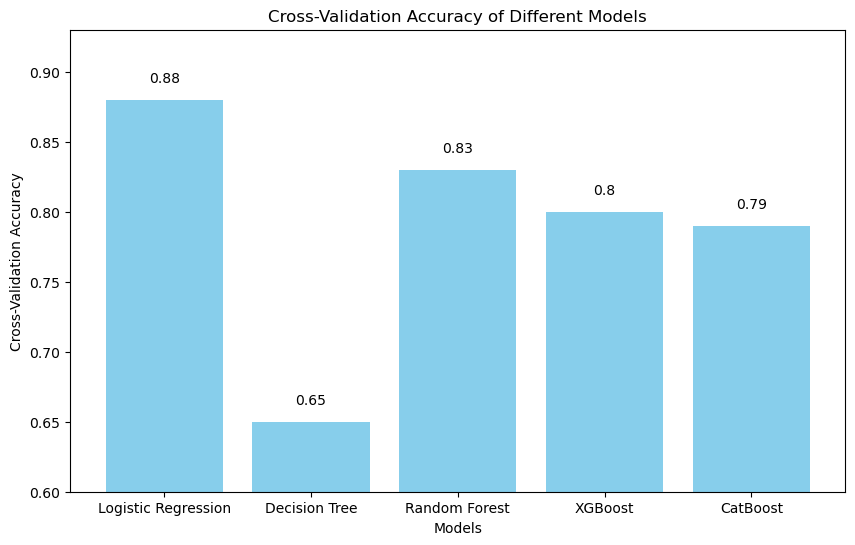

In [91]:
import numpy as np
from transformers import AutoTokenizer, OpenAIGPTModel

# Load the pre-trained OpenAI GPT model and tokenizer
tokenizer = OpenAIGPTTokenizer.from_pretrained("openai-community/openai-gpt")
model = OpenAIGPTModel.from_pretrained("openai-community/openai-gpt")

# Move the model to the GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

def gpt_tokenizer(text):
    # Encode the text using the OpenAI GPT tokenizer
    inputs = tokenizer(text, return_tensors='pt', max_length=512)
    return inputs

def get_gpt_embeddings(text, model, tokenizer):
    inputs=gpt_tokenizer(text)
    inputs = {k: v.to(device) for k, v in inputs.items()}  # Move inputs to the GPU
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()  # Move outputs to the CPU before converting to numpy


# Create OpenAI GPT embeddings for each text
df['vector_gpt'] = df['review'].apply(lambda text: get_gpt_embeddings(text, model, tokenizer))
# Convert list of vectors to a numpy array
X_GPT = np.array(df['vector_gpt'].tolist())
evaluate_models_cv(models, X_GPT, y)


# Fine-tuning

## GPT + LogisticRegression

It seems like the best embedding is the GPT embedding with the LogisticRegression() model for this dataset, let's use GridSearch to make it better

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
lr = LogisticRegression()

In [94]:
param_grid = {
    'C': np.logspace(-4, 4, 20),  # Regularization strength
    'penalty': ['l1', 'none'],  # Types of penalties
    'solver': ['newton-cg', 'liblinear', 'saga'],  # Solvers
    'max_iter': [200, 300]  # Maximum number of iterations taken for the solvers to converge  
}

In [95]:
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy',verbose=1)

In [96]:
# Perform the grid search on the resampled training data
grid_search.fit(X_GPT, y)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Parameters: {'C': 4.281332398719396, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy Score: 0.9199999999999999


# Saving the best model

In [82]:
import joblib

In [39]:
best_rf = grid_search.best_estimator_

In [84]:
joblib.dump(best_rf, "lr_GPT_sentA_model.pkl")

['lr_GPT_sentA_model.pkl']

In [90]:
!pip freeze > modules.txt